# 그래프, 트리

그래프 : 노드와 노드사이의 간선의 정보를 가지고 있는 자료구조
    
트리 : 부모 자식간의 계층모델
    
우선순위 큐 : 최소힙 or 최대힙 사용 -> 최소힙은 트리에 속함(부모노드가 자식노드보가 크기가 작은 트리)   
    
<그래프 구현방식>

인접행렬 : 2차원 배열을 사용하는 방식 
    
인접리스트 : 리스트를 사용하는 방식    

노드의 개수 V, 간선의 개수 : E
    
인접행렬-> 메모리공간: O(V^2) , 간선비용 탐색 : O(1) -> 플로이드 워셜 알고리즘 

인접리스트-> 메모리공간: O(E), 간선비용 탐색 : O(V) -> 다익스트라 알고리즘


# 서로소 

서로소 집합 : 공통원소가 없는 두 집합
    
서로소 집합 자료구조 -> 트리 자료구조 이용

1. union(합집합)연산으로 서로 연결된 A,B를 확인

   1) A,B의 루트노드 A' , B'를 찾음

   2) A'를 B'의 부모노드로 설정 


2. 1번을 반복

-> 서로소 부분집합으로 나누어진 원소들의 데이터를 처리하기 위한 자료구조

In [2]:
#서로소 집합 알고리즘 소스코드

#특정원소가 속한 집합 찾기

def find_parent(parent,x):
    # 루트노드가 아니라면, 루트 노드를 찾을떄까지 재귀적으로 호출 -> 경로 압축
    if parent[x] !=x:
        return find_parent(parent, parent[x])
    return x
# 두 원소가 속한 집합을 합치기 
def union_parent(parent,a,b): # union -> 루트노드를 연결하나 더 작은 번호를 부모노드로 할당
    a= find_parent(parent, a)
    b= find_parent(parent,b)
    if a < b:
        parent[b]= a
    else:    
        parent[a]= b
        
# 노드의 개수와 간선(union 연산)의 개수 입력
v,e = map(int, input().split())
parent = [0]*(v+1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1,v+1):
    parent[i]=i

# union 연산을 각각 수행
for i in range(e):
    a,b = map(int,input().split())
    union_parent(parent,a,b)
    
# 각 원소가 속한 집합 출력
print('각 원소가 속한 집합:', end='')
for i in range(1,v+1):
    print(find_parent(parent,i),end='')
    
print()

# 부모 테이블 내용 출력

print('부모테이블 :', end='')
for i in range(1,v+1):
    print(parent[i],end='')


6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합:111155
부모테이블 :112155

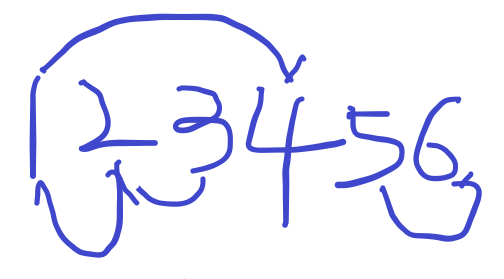

## 사이틀 판별시 -> 서로소 집합 사용

1. 각 간선을 확인하여 두 노드의 루트 노드를 확인한다.
    
    1) 루트 노드가 서로 다르다면 두 노드에 대하여 union연산을 수행한다
    
    2) 루트 노드가 서로 같다면 사이클발생!
    
2. 모든 간선에 대하여 1.을 반복 

In [7]:
# 서로소 집합을 활용한 사이클 판별 소스코드

# 특정원소가 속한 집합을 찾기

def find_parent(parent,x):
    # 루트 노드가 아니라면, 루트 노드를 찾을떄까지 재귀적으로 호출 
    if parent[x] !=x:
        parent[x] = find_parent(parent,parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기 
def union_parent(parent,a,b): # union -> 루트노드를 연결하나 더 작은 번호를 부모노드로 할당
    a= find_parent(parent, a)
    b= find_parent(parent,b)
    if a < b:
        parent[b]= a
    else:    
        parent[a]= b
        
# 노드의 개수와 간선(union 연산)의 개수 입력
v,e = map(int, input().split())
parent = [0]*(v+1) # 부모 테이블 초기화

# 부모 테이블에서 부모를 자기자신으로 초기화
for i in range(1,v+1):
    parent[i]=i

cycle=False # 사이클 발생여부


for i in range(e):
    a,b= map(int,input().split())
    # 사이클이 발생한 경우 종료 
    if find_parent(parent,a) ==find_parent(parent,b):
        cycle=True
        break
    # 사이클이 발생하지 않았다면 합집합(union)수행
    else:
        union_parent(parent,a,b)

3 3
1 2
1 3
2 3


In [8]:
if cycle:
    print("사이클 발생")
else:
    print("사이클 발생안함")

사이클 발생


# 신장트리 

### 신장트리 -> 하나의 그래프가 있을때 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프

### 트리의 성립조건 : 모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않음

## 크루스칼 알고리즘 -> 그리디 알고리즘

-> 신장 트리 중에서 최소 비용으로 만들 수 있는 신장 트리를 찾는 알고리즘 -> 간선의 개수가 E개일때 O(ElogE)의 시간 복잡도

(1) -23->(2)-13->(3)
(1)-25->(3)

다음과 같이 연결되어 있을때 

(1)-23->(2)-13->(3)

이 최소비용으로 만들 수 있는 신장트리


1. 간선데이터를 비용에 따라 오름차순으로 정렬
2. 간선을 하나씩 확인하며 현재의 간선이 사이클을 발생시키는지 확인한다.

    1) 사이클이 발생하지 않는 경우 최소 신장 트리에 포함시킨다.
    
    2) 사이클이 발생하는 경우 최소 신장 트리에 포함시키지 않는다.

3. 모든 간선에 대하여 2.를 반복    

In [24]:
# 특정원소가 속한 집합을 찾기

def find_parent(parent,x):
    # 루트 노드가 아니라면, 루트 노드를 찾을떄까지 재귀적으로 호출 
    if parent[x] !=x:
        parent[x] = find_parent(parent,parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기 
def union_parent(parent,a,b): # union -> 루트노드를 연결하나 더 작은 번호를 부모노드로 할당
    a= find_parent(parent, a)
    b= find_parent(parent,b)
    if a < b:
        parent[b]= a
    else:    
        parent[a]= b
        
# 노드의 개수와 간선(union 연산)의 개수 입력
v,e = map(int, input().split())
parent = [0]*(v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와 최종 비용을 담을 변수
edges=[]
result=0

# 부모 테이블에서 부모를 자기자신으로 초기화
for i in range(1,v+1):
    parent[i]=i
    
# 모든 간선에 대한 정보를 입력받기 

for _ in range(e):
    a, b, cost= map(int,input().split())
    # 비용순으로 정렬하기 위해 튜플의 첫번째 원소를 비용으로 설정
    edges.append((cost,a,b))
    
# 간선을 비용순으로 정렬

edges.sort()

# 간선을 하나씩 확인하며
for edge in edges:
    cost,a,b=edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent,a) != find_parent(parent,b):
        union_parent(parent,a,b)
        result+=cost

print(result)        

7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
159


In [25]:
# 특정원소가 속한 집합을 찾기

def find_parent(parent,x):
    # 루트 노드가 아니라면, 루트 노드를 찾을떄까지 재귀적으로 호출 
    print(parent[x],x)
    if parent[x] !=x:
        print('parent[x] !=x', parent[x],x)
        parent[x] = find_parent(parent,parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기 
def union_parent(parent,a,b): # union -> 루트노드를 연결하나 더 작은 번호를 부모노드로 할당
    a= find_parent(parent, a)
    b= find_parent(parent,b)
    print(a,b)
    if a < b:
        parent[b]= a
    else:    
        parent[a]= b
        
# 노드의 개수와 간선(union 연산)의 개수 입력
v,e = 7,9
parent = [0]*(v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와 최종 비용을 담을 변수
result=0

# 부모 테이블에서 부모를 자기자신으로 초기화
for i in range(1,v+1):
    parent[i]=i

# 간선을 하나씩 확인하며
for edge in edges:
    cost,a,b=edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent,a) != find_parent(parent,b):
        union_parent(parent,a,b)
        result+=cost

print(result)       

3 3
4 4
3 3
4 4
3 4
3 4
parent[x] !=x 3 4
3 3
7 7
3 4
parent[x] !=x 3 4
3 3
7 7
3 7
3 4
parent[x] !=x 3 4
3 3
6 6
3 4
parent[x] !=x 3 4
3 3
6 6
3 6
3 6
parent[x] !=x 3 6
3 3
3 7
parent[x] !=x 3 7
3 3
1 1
2 2
1 1
2 2
1 2
1 2
parent[x] !=x 1 2
1 1
3 6
parent[x] !=x 3 6
3 3
1 2
parent[x] !=x 1 2
1 1
3 6
parent[x] !=x 3 6
3 3
1 3
1 2
parent[x] !=x 1 2
1 1
1 3
parent[x] !=x 1 3
1 1
5 5
3 6
parent[x] !=x 3 6
1 3
parent[x] !=x 1 3
1 1
5 5
1 6
parent[x] !=x 1 6
1 1
5 1
1 1
1 5
parent[x] !=x 1 5
1 1
159
